# Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from markov_chain.markovchain import MarkovChain

def p_infty(p):
    p_init, p_prev = p, []
    for i in range(100):
        p_prev += [p.round(5).tolist()]
        p = np.matmul(p, p_init)
        if p_prev[-1] == p.round(5).tolist():
            return p
    return p_prev

def mul_p_infty(p, pi):
    init, pi_prev = pi, []
    for i in range(100):
        pi_prev += [pi.round(5).tolist()]
        pi = pi.dot(p)
        if pi_prev[-1] == pi.round(5).tolist():
            return pi
    return pi_prev

def eigen(p):
    value, vector = np.linalg.eig(np.transpose(p))
    vector = [vector[:, i] for i in range(len(value)) if value[i].round(5) == 1]
    if len(vector) != 1:
        val, vec = np.linalg.eig(np.transpose(p))
        print(f'Eigenvalue & eigenvector:\n{val}\n{vec}')
    vector = vector[0]
    vector = vector / sum(vector)
    return vector

# Absorbing Markov Chain

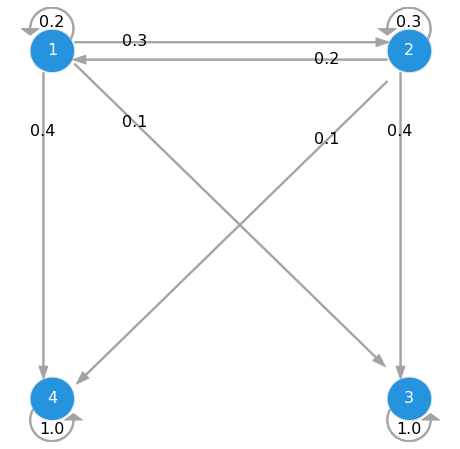

pi_init = [1.0, 0.0, 0.0, 0.0] ; pi_infty = [0.0, 0.0, 0.38, 0.62] ; pi_infty x P = [0.0, 0.0, 0.38, 0.62]
pi_init = [0.2, 0.8, 0.0, 0.0] ; pi_infty = [0.0, 0.0, 0.62, 0.38] ; pi_infty x P = [0.0, 0.0, 0.62, 0.38]
pi_init = [0.0, 1.0, 0.0, 0.0] ; pi_infty = [0.0, 0.0, 0.68, 0.32] ; pi_infty x P = [0.0, 0.0, 0.68, 0.32]
pi_init = [0.0, 0.0, 1.0, 0.0] ; pi_infty = [0.0, 0.0, 1.0, 0.0] ; pi_infty x P = [0.0, 0.0, 1.0, 0.0]
pi_init = [0.3, 0.3, 0.4, 0.0] ; pi_infty = [0.0, 0.0, 0.718, 0.282] ; pi_infty x P = [0.0, 0.0, 0.718, 0.282]
Eigenvalue & eigenvector:
[1.  1.  0.  0.5]
[[ 0.          0.         -0.67728546 -0.39466852]
 [ 0.          0.          0.67728546 -0.59200278]
 [ 1.          0.         -0.20318564  0.55253593]
 [ 0.          1.          0.20318564  0.43413537]]
pi = [0. 0. 1. 0.] ; pi x P = [0. 0. 1. 0.]
P^infty
[[0.   0.   0.38 0.62]
 [0.   0.   0.68 0.32]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]]
N = (I - Q)^-1
[[1.4 0.6]
 [0.4 1.6]]
N = sum_k Q^k
[[1.4 0.6]
 [0.4 1.

In [4]:
p = np.array([
    [0.2, 0.3, 0.1, 0.4],
    [0.2, 0.3, 0.4, 0.1],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0],
])

mc = MarkovChain(p, ['1', '2', '3', '4'])
mc.draw()
# mc.draw('./markov-chain-absorbing.png')

pi_init = np.array([1.0, 0.0, 0.0, 0.0])
pi_infty = mul_p_infty(p, pi_init)
print(f'pi_init = {pi_init.round(3).tolist()}', end=' ; ')
print(f'pi_infty = {pi_infty.round(3).tolist()}', end=' ; ')
print(f'pi_infty x P = {pi_infty.dot(p).round(3).tolist()}')

pi_init = np.array([0.2, 0.8, 0.0, 0.0])
pi_infty = mul_p_infty(p, pi_init)
print(f'pi_init = {pi_init.round(3).tolist()}', end=' ; ')
print(f'pi_infty = {pi_infty.round(3).tolist()}', end=' ; ')
print(f'pi_infty x P = {pi_infty.dot(p).round(3).tolist()}')

pi_init = np.array([0.0, 1.0, 0.0, 0.0])
pi_infty = mul_p_infty(p, pi_init)
print(f'pi_init = {pi_init.round(3).tolist()}', end=' ; ')
print(f'pi_infty = {pi_infty.round(3).tolist()}', end=' ; ')
print(f'pi_infty x P = {pi_infty.dot(p).round(3).tolist()}')

pi_init = np.array([0.0, 0.0, 1.0, 0.0])
pi_infty = mul_p_infty(p, pi_init)
print(f'pi_init = {pi_init.round(3).tolist()}', end=' ; ')
print(f'pi_infty = {pi_infty.round(3).tolist()}', end=' ; ')
print(f'pi_infty x P = {pi_infty.dot(p).round(3).tolist()}')

pi_init = np.array([0.3, 0.3, 0.4, 0.0])
pi_infty = mul_p_infty(p, pi_init)
print(f'pi_init = {pi_init.round(3).tolist()}', end=' ; ')
print(f'pi_infty = {pi_infty.round(3).tolist()}', end=' ; ')
print(f'pi_infty x P = {pi_infty.dot(p).round(3).tolist()}')

pi = eigen(p)
print(f'pi = {pi} ; pi x P = {pi.dot(p)}')

print(f'P^infty')
print(p_infty(p).round(5))

q = np.array([
    [0.2, 0.3],
    [0.2, 0.3],
])

print('N = (I - Q)^-1')
print(np.linalg.inv(np.identity(2) - q))

q_i = np.identity(2)
n = np.identity(2)
for i in range(100):
    q_i = np.matmul(q_i, q)
    n = n + q_i

print('N = sum_k Q^k')
print(n)

# Periodic Markov Chain

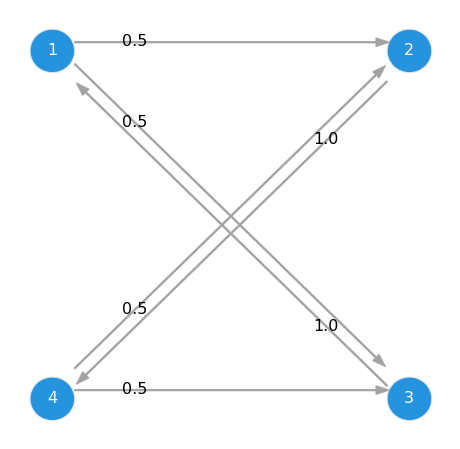

pi = [0.25 0.25 0.25 0.25] ; pi x P = [0.25 0.25 0.25 0.25]
Not converges, [[1.0, 0.0, 0.0, 0.0], [0.0, 0.5, 0.5, 0.0], [0.5, 0.0, 0.0, 0.5], [0.0, 0.5, 0.5, 0.0], [0.5, 0.0, 0.0, 0.5]]
Not converges, [[0.0, 0.5, 0.5, 0.0], [0.5, 0.0, 0.0, 0.5], [0.0, 0.5, 0.5, 0.0], [0.5, 0.0, 0.0, 0.5], [0.0, 0.5, 0.5, 0.0]]
Not converges, 
[[0.  0.5 0.5 0. ]
 [0.  0.  0.  1. ]
 [1.  0.  0.  0. ]
 [0.  0.5 0.5 0. ]]
[[0.5 0.  0.  0.5]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]]
[[0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]
 [0.5 0.  0.  0.5]
 [0.  0.5 0.5 0. ]]
[[0.5 0.  0.  0.5]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]]
Not converges, 
[[0.5 0.  0.  0.5]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]]
[[0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]
 [0.5 0.  0.  0.5]
 [0.  0.5 0.5 0. ]]
[[0.5 0.  0.  0.5]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]]
[[0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]
 [0.5 0.  0.  0.5]
 [0.  0.5 0.5 0. ]]


In [16]:
p = np.array([
    [0.0, 0.5, 0.5, 0.0],
    [0.0, 0.0, 0.0, 1.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 0.5, 0.5, 0.0],
])

mc = MarkovChain(p, ['1', '2', '3', '4'])
mc.draw()
# mc.draw('./markov-chain-periodic.png')

pi = eigen(p)
print(f'pi = {pi} ; pi x P = {pi.dot(p)}')

pi_infty = mul_p_infty(p, np.array([1.0, 0.0, 0.0, 0.0]))
print(f'Not converges, {pi_infty[:5]}' if type(pi_infty) == list else f'Converges to {pi_infty}')
print(f'Not converges, {pi_infty[-5:]}' if type(pi_infty) == list else f'Converges to {pi_infty}')
p_infty_ = p_infty(p)
print(f'Not converges, \n{np.array(p_infty_[0])}')
print(f'{np.array(p_infty_[1])}\n{np.array(p_infty_[2])}\n{np.array(p_infty_[3])}')
print(f'Not converges, \n{np.array(p_infty_[-1])}')
print(f'{np.array(p_infty_[-2])}\n{np.array(p_infty_[-3])}\n{np.array(p_infty_[-4])}')

# Ergodic Markov Chain

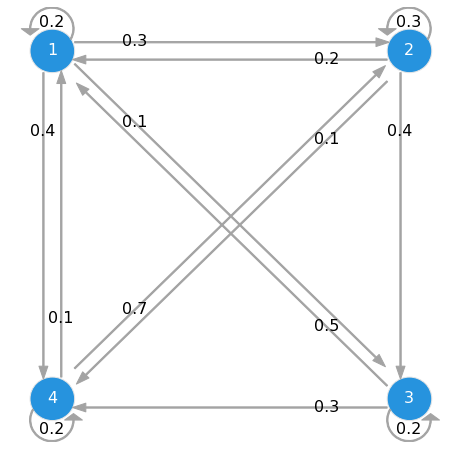

p0 = [1.0, 0.0, 0.0, 0.0] ; d = [0.236, 0.334, 0.197, 0.233] ; dP = [0.236, 0.334, 0.197, 0.233]
p0 = [0.2, 0.8, 0.0, 0.0] ; d = [0.236, 0.334, 0.197, 0.233] ; dP = [0.236, 0.334, 0.197, 0.233]
p0 = [0.0, 1.0, 0.0, 0.0] ; d = [0.236, 0.334, 0.197, 0.233] ; dP = [0.236, 0.334, 0.197, 0.233]
d = [0.236-0.j 0.334-0.j 0.197-0.j 0.233-0.j] ; dP = [0.236+0.j 0.334+0.j 0.197+0.j 0.233+0.j]
P^infty
[[0.23565 0.33435 0.19663 0.23336]
 [0.23565 0.33435 0.19663 0.23336]
 [0.23565 0.33435 0.19663 0.23336]
 [0.23565 0.33435 0.19663 0.23336]]


In [17]:
p = np.array([
    [0.2, 0.3, 0.1, 0.4],
    [0.2, 0.3, 0.4, 0.1],
    [0.5, 0.0, 0.2, 0.3],
    [0.1, 0.7, 0.0, 0.2],
])

mc = MarkovChain(p, ['1', '2', '3', '4'])
mc.draw()
# mc.draw('./markov-chain-ergodic.png')

d_init = np.array([1.0, 0.0, 0.0, 0.0])
d = mul_p_infty(p, d_init)
print(f'p0 = {d_init.round(3).tolist()} ; d = {d.round(3).tolist()} ; dP = {d.dot(p).round(3).tolist()}')

d_init = np.array([0.2, 0.8, 0.0, 0.0])
d = mul_p_infty(p, d_init)
print(f'p0 = {d_init.round(3).tolist()} ; d = {d.round(3).tolist()} ; dP = {d.dot(p).round(3).tolist()}')

d_init = np.array([0.0, 1.0, 0.0, 0.0])
d = mul_p_infty(p, d_init)
print(f'p0 = {d_init.round(3).tolist()} ; d = {d.round(3).tolist()} ; dP = {d.dot(p).round(3).tolist()}')

d = eigen(p)
print(f'd = {d.round(3)} ; dP = {d.dot(p).round(3)}')

print(f'P^infty')
print(p_infty(p).round(5))